# Introduction:
The purpose of this EDA is to explore the various attributes of the dataset and see if some basic insights can be derived. The data fields show a number of features that are largely numerical in nature.

A feature that could be easy to understand is the feature leading to songs that people like. Next, predictions as to whether or not a song will be liked based on the other features.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import json

In [2]:
df = pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


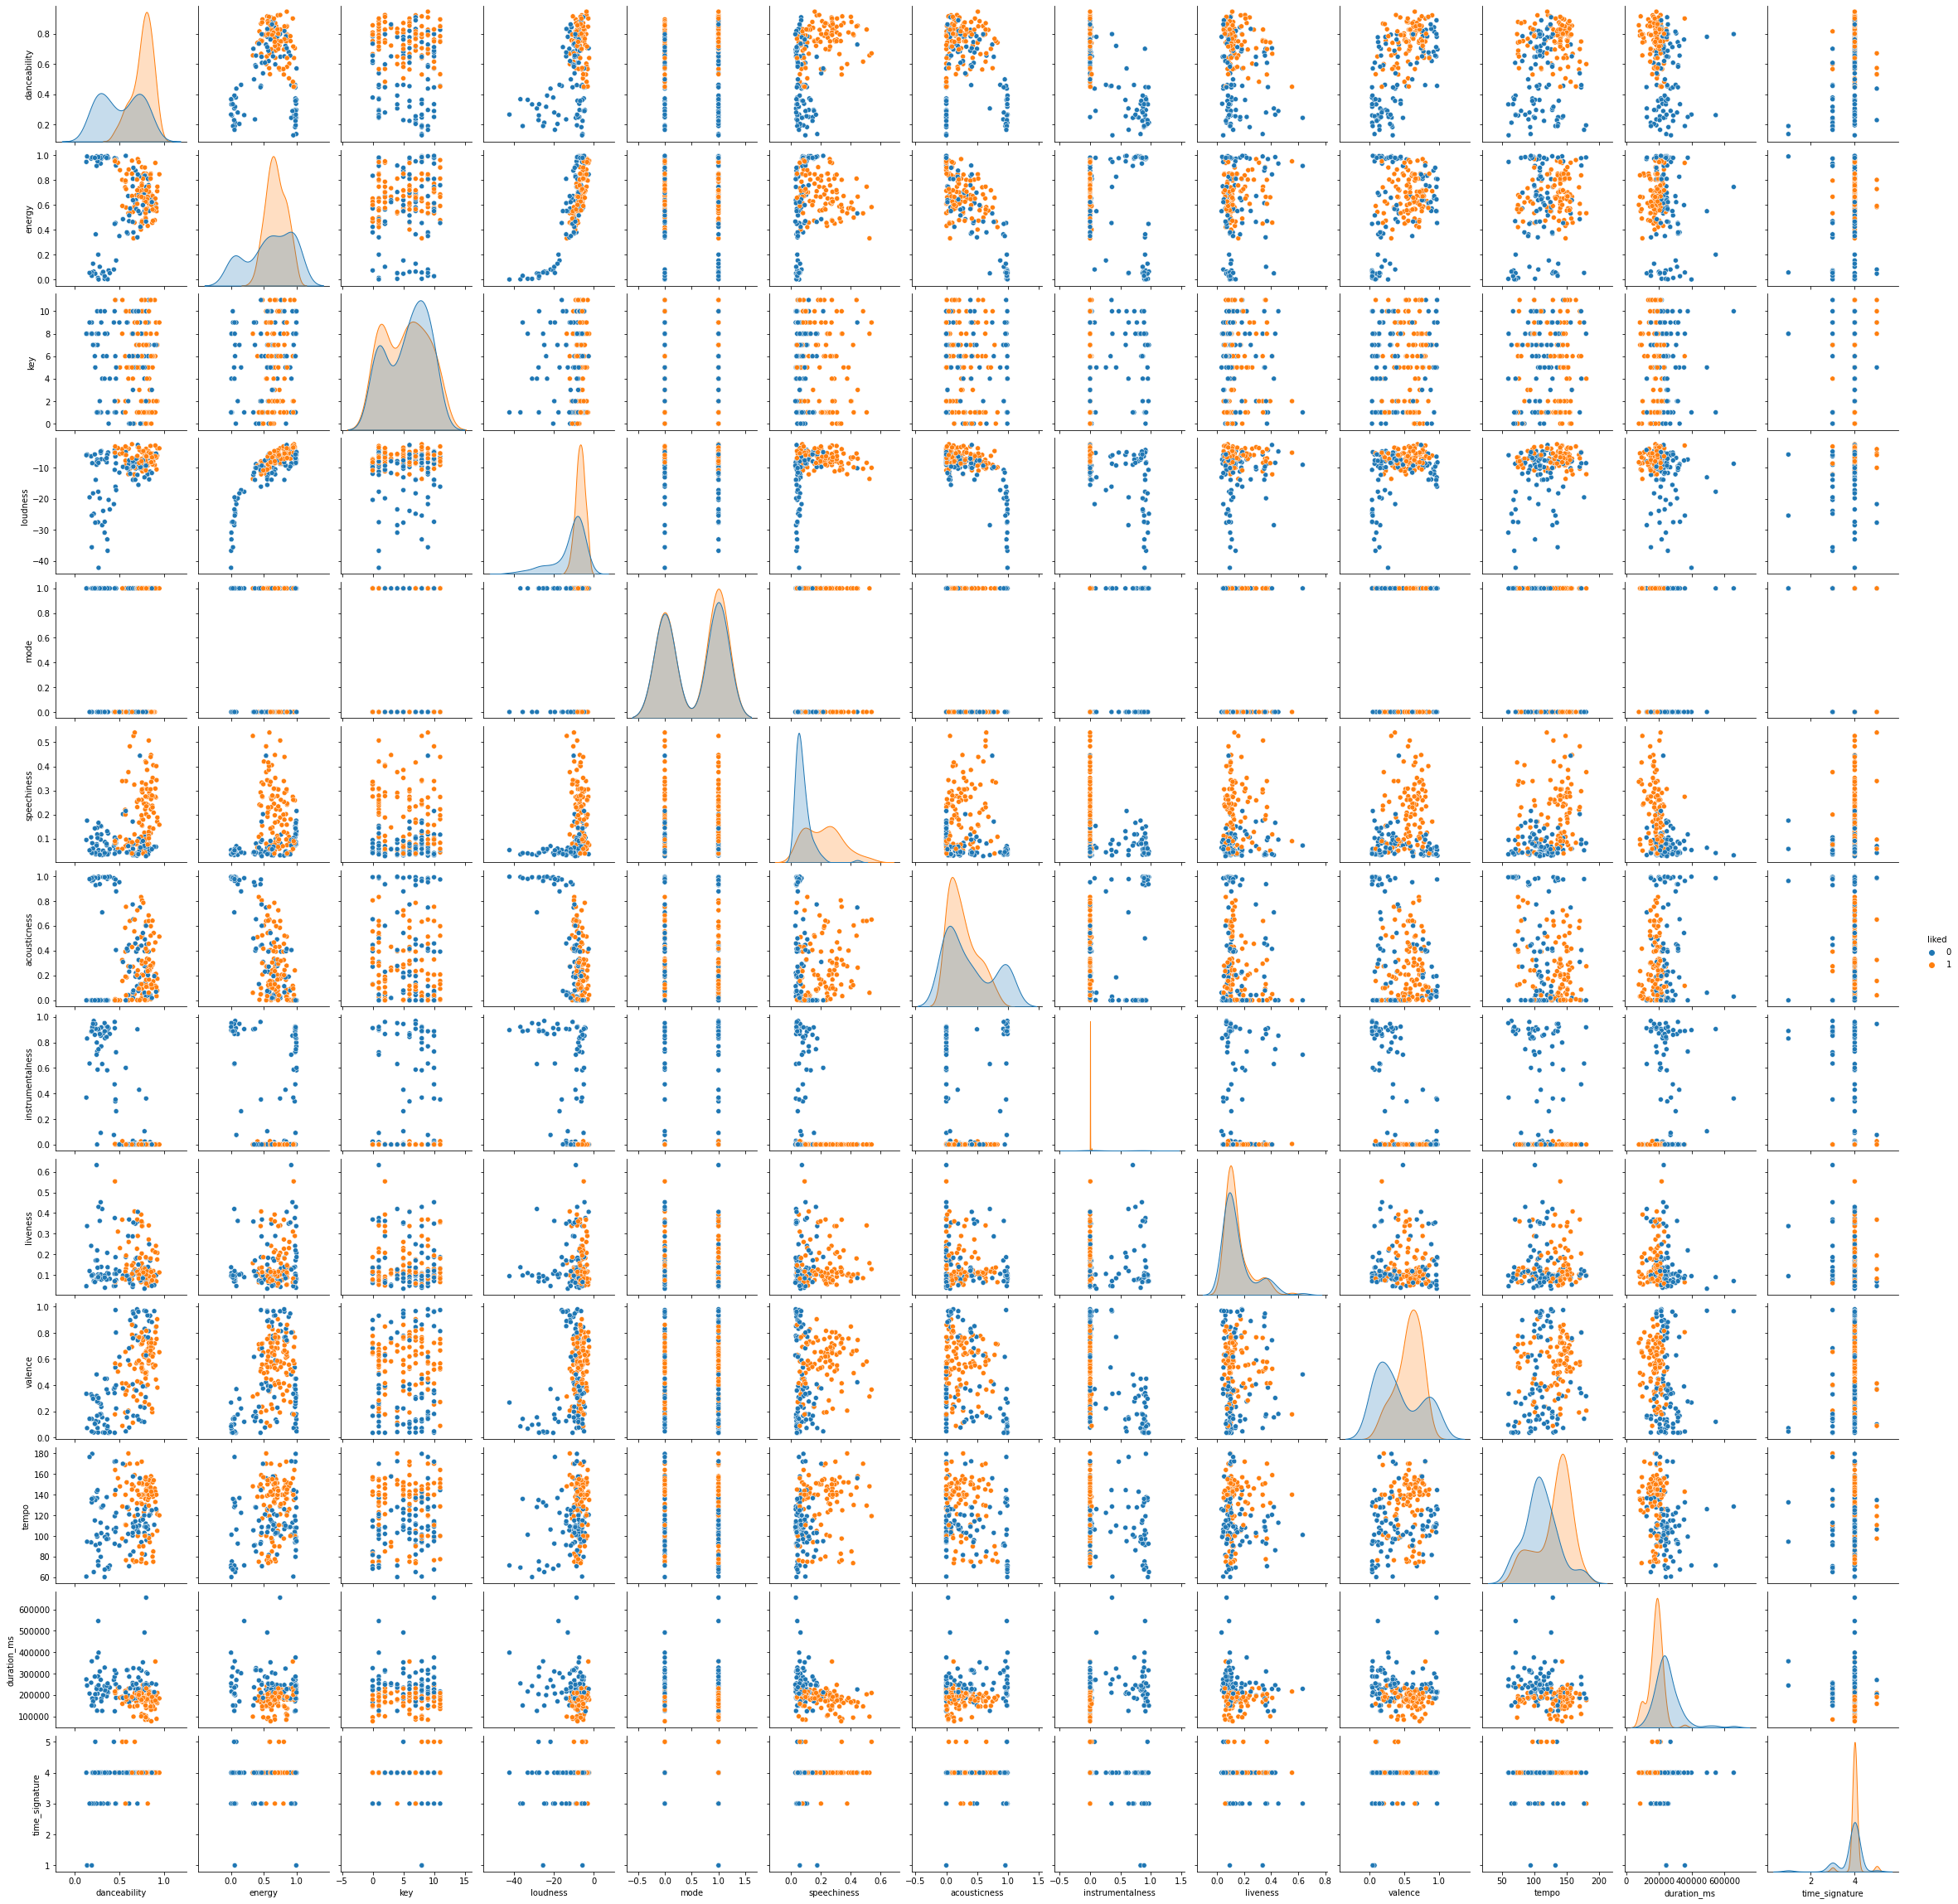

In [4]:
sns.pairplot(df, hue = "liked")

## Observations:
#### Danceability
    - Data is right skewed
    - Filtering for 'liked', the distribution of danceability has less variance and there is a distinct range where liked songs occupy
#### Energy
    - Data is left skewed
    - Filtering for 'liked', the distribution of energy has less variance and there is a distinct clusters where songs are very likely to be unliked
#### Key
    - Data is categorical and relatively uniformly distributed
#### Loudness
    - Data is left skewed
    - Loudness correlated with Energy
    - Filtering for 'liked', the distribution of loudness has less variance and there is a distinct range where liked songs occupy
#### Mode
    - Data is binary
    - No difference between 'liked' and 'unliked' distributions
#### Speechiness
    - Data is right skewed
    - Filtering for 'liked', the distribution of speechiness has less variance for unliked songs and there is a distinct range where songs are not liked
#### Acousticness
    - Data is right skewed
    - Filtering for 'liked', the distribution of acousticness follows similar shapes; however, beyond a certain range songs are not liked
#### Instrumentalness
    - Majority of data is zero or near zero; however, if the zero records are ignored the data is left skewed
    - Filtering for 'liked', the distribution of instrumentalness is extremely tight for songs that are liked
#### Liveness
    - Data is right skewed
    - Distribution between liked and unliked songs are similar from the dataset
    - Clustering can be seen through the various features with respect to the 'liked' feature
#### Valence
    - Data appears fairly uniform
    - Splitting the data into 'liked' and 'unliked', there is a specific range of valence where songs are liked and unliked
#### Tempo
    - Data appears to follow a normal distribution
    - Liked songs are typically slightly higher tempo
#### Duration
    - Data appears to be a normal distribution with a low volume right tail
    - Clear clustering seen on the duration metric between liked and unliked songs
    - Durations of liked songs tend to be shorter
#### Time Signature
    - Data is categorical with the large majority with a time signature of 4
    - Tighter distribution with less variance for liked songs on the time signature
#### Liked
    - Data is binary with either feature evenly distributed
    - Data is likely this way due to the dataset provided being aggregated on liked and unliked songs

C:\Users\srini\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

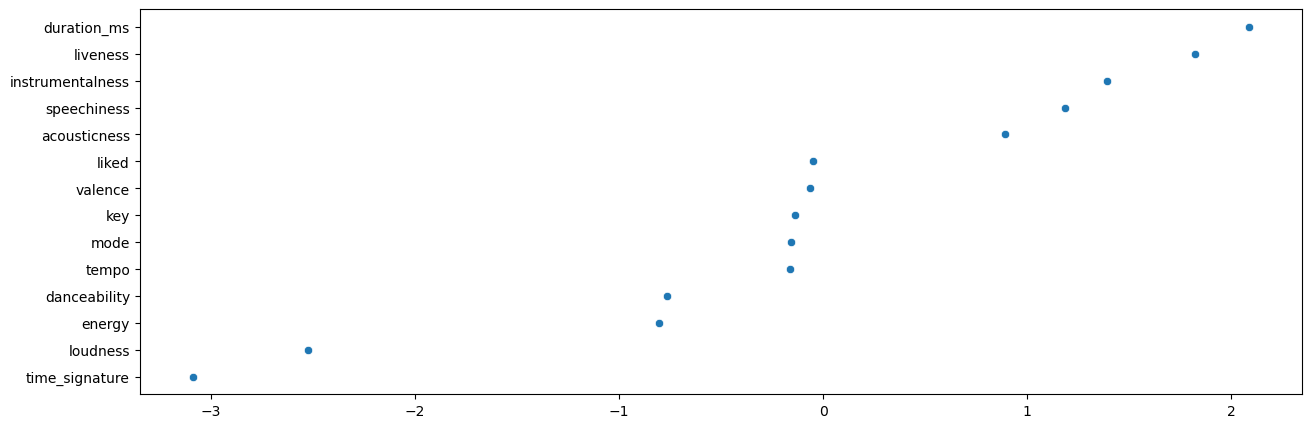

In [5]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.skew().sort_values(ascending=False),df.skew().sort_values(ascending=False).index)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
X = df[[x for x in df.columns if x != 'liked']]
y = df['liked']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=143)

# Scaling the various features to deal with the skew
scaler = StandardScaler()
X_train_n = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_n = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# Creating an instance of a logistic regression model
log = LogisticRegression()

# Fitting the model with the scaled data
log.fit(X_train_n, y_train)

# Create predictions
predictions = log.predict(X_test_n)

In [8]:
log.score(X_test_n,y_test)

0.826530612244898

In [9]:
metrics.confusion_matrix(y_test,predictions)

array([[40,  1],
       [16, 41]], dtype=int64)

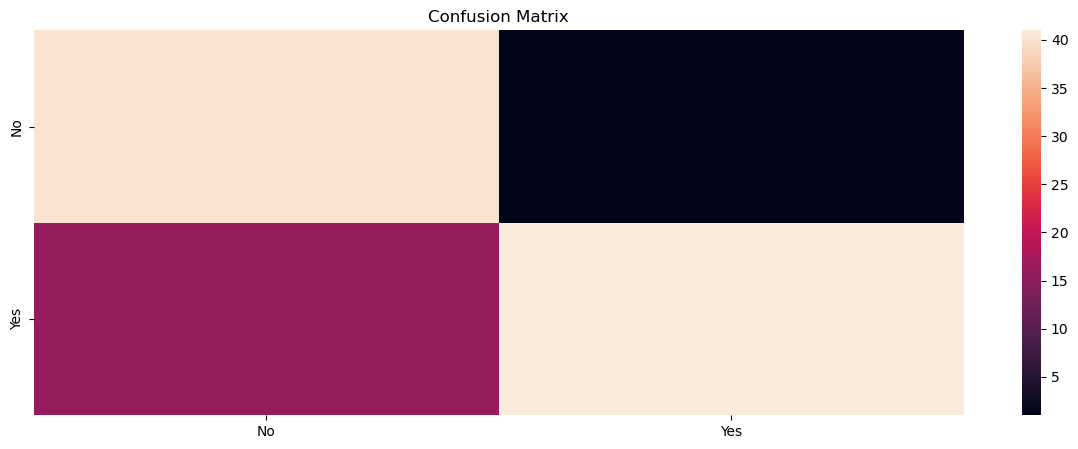

In [10]:
plt.figure(figsize=(15,5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('y_test')
sns.heatmap(metrics.confusion_matrix(y_test,predictions),xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.show()

In [11]:
X = df[[x for x in df.columns if x != 'liked']]
y = df['liked']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=143)

# Scaling the various features to deal with the skew
scaler = StandardScaler()
X_train_n = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_n = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# Creating an instance of a logistic regression model
log = LogisticRegression()

# Fitting the model with the scaled data
log.fit(X_train_n, y_train)

# Predict
predictions = log.predict(X_test_n)

# Score
score = log.score(X_test_n,y_test)
print(score)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
print(confusion_matrix)

0.8205128205128205
[[14  0]
 [ 7 18]]


# Conclusion
Initial pass of the logistic regression modeling provides a 82 - 85% score. Not terrible, but more work to come to see if we can't get that higher.